In [21]:
import pandas as pd
from sklearn import tree
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,max_error,mean_absolute_error

In [22]:
#Loading the file
df = pd.read_excel(r'D:\Books\Project\Draft1_fabien\leak-exp-day2\Exact\release2a.xlsx')
s1 = df.iloc[:,0]
s2 = df.iloc[:,1]
s3 = df.iloc[:,2]
s4 = df.iloc[:,3]
s5 = df.iloc[:,4]
s6 = df.iloc[:,5]
s7 = df.iloc[:,6]
s8 = df.iloc[:,7]
s9 = df.iloc[:,8]
s10 = df.iloc[:,9]
s11 = df.iloc[:,10]
s12 = df.iloc[:,11]
s13 = df.iloc[:,12]
s14 = df.iloc[:,13]
s15 = df.iloc[:,14]
s16 = df.iloc[:,15]
s17 = df.iloc[:,16]
s18 = df.iloc[:,17]
s19 = df.iloc[:,18]
s20 = df.iloc[:,19]
status = df.iloc[:,20] 

In [23]:
#creating features and labels
n_features = list(zip(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20))
n_samples = status

In [24]:
#Decision tree  regression
clf = tree.DecisionTreeRegressor()
#spliting of data
X_train, X_test, y_train, y_test = train_test_split(n_features,n_samples, test_size=0.5,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
#train model
clf.fit(X_train,y_train)
#prediction
y_pred = clf.predict(X_test_std)
print('percentage Accuracy:',100*metrics.accuracy_score(y_test,y_pred))

percentage Accuracy: 95.17766497461929


In [25]:
#false prediction
print((y_test != y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test != y_pred).sum()))


19 / 394


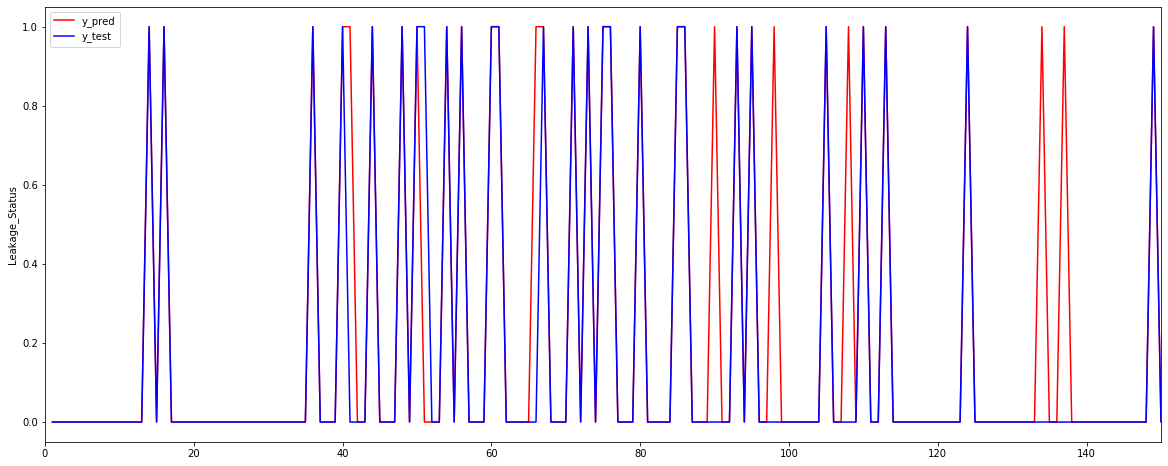

In [26]:
#Graph ploting Features vs Predict values
k = []
for i in range(0,len(X_test)):
    k.append(i+1)
plt.figure(figsize = (20,8))
plt.xlim(0,150)
sns.lineplot(y = y_pred, x = k,label = "y_pred",color = 'red')
sns.lineplot(y = y_test, x = k,label ="y_test",color = 'blue')
plt.legend()
plt.show()

In [27]:
#max error
me = max_error(y_test, y_pred)
print('Maximum Error:%.3f'%(me))

Maximum Error:1.000


In [28]:
#mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:%.3f'%(mae))

Mean absolute error:0.048


In [29]:
#Mean squared error
mse = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('mean squared error:%.3f'%(mse))

mean squared error:0.048


In [30]:
leak = [] 
for i in range(0,len(y_pred)):
    if y_pred[i] == 1:
        leak.append(X_test[i])

In [31]:
print(leak[0][0])

0.04


In [41]:
y = [0,410,810,1217,0,410,30,810,1217,0,410,810,1217,410,810,810,1217,1217,0,410]
x = [450,450,450,450,855,855,81,855,855,1257,1257,1257,0,0,0,1672,1672,1257,1672,1672]
x_co = []
y_co = []
num_y = 0
num_x = 0
den = 0
for i in range(0,len(leak)):
    for j in range(0,20):
        num_x = num_x + (x[j]*leak[i][j])
        num_y = num_y + (y[j]*leak[i][j])
        den = den + leak[i][j]
    x_co.append(num_x/den)
    y_co.append(num_y/den)
    num_x = num_y = den = 0
for i in range(0,len(x_co)):
    print(x_co[i],'\t\t\t',y_co[i])


73
